# Метод главных компонент Principal component analysis (PCA)

план ноутбука 

1) Основная идея 
2) пример, применение
3) необходимый мат аппарат (сз, свд - ссылки, книги)
4) алгоритм (ссылки статьи)


### Youtube (для интуиции):
### PCA

[StatQuest: Principal Component Analysis][1]

[Principal Component Analysis (PCA) - Computerphile][2]

[1]: https://www.youtube.com/watch?v=FgakZw6K1QQ
[2]: https://www.youtube.com/watch?v=TJdH6rPA-TI

### Linear algebra:

[3blue1brown: Eigenvalues](https://www.youtube.com/watch?v=PFDu9oVAE-g)

[SVD](https://www.youtube.com/watch?v=vSczTbgc8Rc)

# 1 Основная идея

[источник](https://stepik.org/lesson/329910/step/1?unit=313250)

Понижение размерности это различные техники, которые **уменьшают количество исходных фичей в наборе данных, с сохранением как можно больше исходной информации (о первоначальном датасете)**. С т.з. машинного обучения это преследует несколько целей. 

Две из них: 
- меньшие наборы данных легче хранить и использовать для обучения,
- уменьшив количество фичей до двух или трех мы сможем их визуализировать.


Метод главных компонент (Principal component analysis, PCA) это один из популярных методов понижения размерности. 
Но в действительности PCA только ищет другое представление наших данных,
чтобы мы могли лучше разделить наши данные (что может улучшить работу ML алгоритмов).
В процессе работы алгоритма мы определяем порядок главных компонент от наиболее значимых к менее значимым в некотором смысле. 
И понижение размерности можно произвести удаляя менее значимые компоненты (оси/"новые признаки").


PCA представляет собой *ортогональное линейное преобразование*, которое отображает данные из исходного пространство признаков в новую систему координат (новое пространство, признаки уже другие). 

А главные компоненты — это новые переменные в этом пространстве. После преобразования количество главных компонент равно числу изначальных переменных.

![](./imgs/PCA1.png)

PCA определяется как ортогональное линейное преобразование, которое преобразует данные в новую систему координат так, что наибольшая дисперсия некоторой скалярной проекции данных приходится на первую координату (называемую первым главным компонентом), вторую по величине дисперсию на вторая координата и так далее.

При этом PCA пытается поместить максимум возможной информации (дисперсии) в первый компонент, затем максимум оставшейся информации во второй и т.д.

![](./imgs/PCA2.png)

Отбросив компоненты с маленькой информацией, мы уменьшим размерность данных с минимальными потерями.

![](./imgs/PCA3.png)


Недостатки PCA:

- PCA ищет только линейные зависимости.
- Полученные главные компоненты менее интерпретируемы (по сравнению с исходными данными). Так как новые компоненты, являются комбинациями исходных признаков.
- Если мы будем удалять менее ценные компоненты, мы можем отобразить данные в 2D графики, но это приводит к потере информации, и может ухудшить точность модели.

# 2 Примеры применения

[machinelearningmastery: How to Calculate Principal Component Analysis (PCA) from Scratch in Python](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/)

# 2.1 PCA by numpy

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# define a matrix
A = np.array([[1, 2], [3.5,4.5 ], [5, 6]])
print(A)

[[1.  2. ]
 [3.5 4.5]
 [5.  6. ]]


<Axes: >

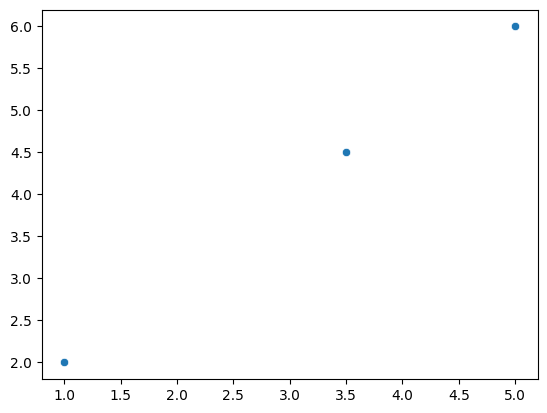

In [3]:
sns.scatterplot(x=A[:,0], y=A[:,1])

In [4]:
# calculate the mean of each column
M = np.mean(A.T, axis=1)
print(M)
# center columns by subtracting column means
C = A - M
print(C)

[3.16666667 4.16666667]
[[-2.16666667 -2.16666667]
 [ 0.33333333  0.33333333]
 [ 1.83333333  1.83333333]]


<Axes: >

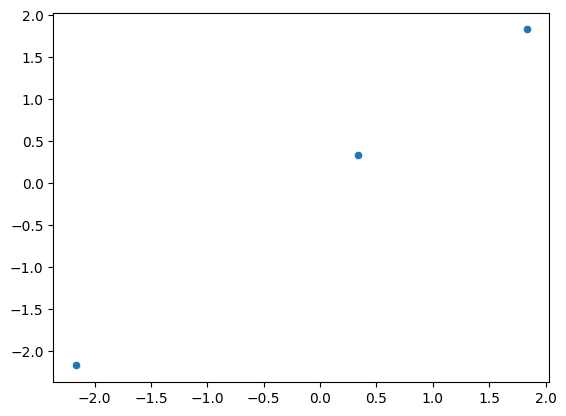

In [5]:
sns.scatterplot(x=C[:,0], y=C[:,1])

In [6]:
# calculate covariance matrix of centered matrix
V = np.cov(C.T)
print(V)

[[4.08333333 4.08333333]
 [4.08333333 4.08333333]]


In [7]:
# eigendecomposition of covariance matrix
values, vectors = np.linalg.eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8.16666667e+00 8.88178420e-16]
[[-3.06412939e+00 -7.45953456e-16]
 [ 4.71404521e-01 -2.46353095e-16]
 [ 2.59272486e+00  1.42224963e-16]]


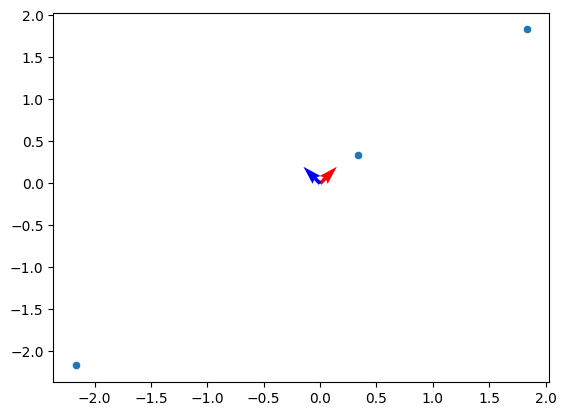

In [8]:
sns.scatterplot(x=C[:,0], y=C[:,1])
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, vectors[0,:], vectors[1,:], color=['r','b'], scale = 21)
plt.show()

# 2.2 PCA from sklearn decomposition

In [9]:
# Principal Component Analysis
import numpy as np
from sklearn.decomposition import PCA
# define a matrix
A = np.array([[1, 2], [1.1, 1.8], [0.95, 2.1], [4.5, 6.8], [5, 6],[5.4, 5.8]])
print(A)

[[1.   2.  ]
 [1.1  1.8 ]
 [0.95 2.1 ]
 [4.5  6.8 ]
 [5.   6.  ]
 [5.4  5.8 ]]


<Axes: >

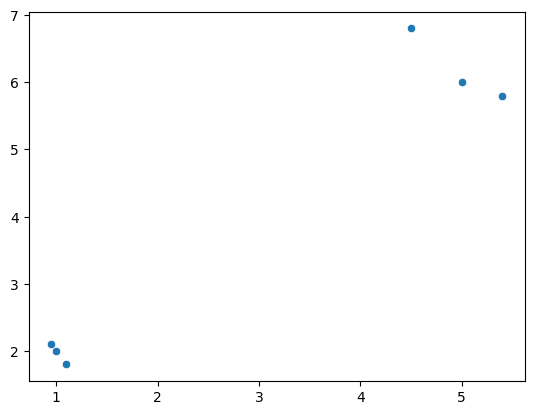

In [10]:
sns.scatterplot(x=A[:,0], y=A[:,1])

In [11]:
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(A)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)
# transform data
B = pca.transform(A)
print(B)

[[ 0.68032575  0.73290987]
 [-0.73290987  0.68032575]]
[10.0645165   0.19756683]
[[-2.88187768  0.04236684]
 [-2.96042707 -0.1669893 ]
 [-2.84260298  0.14704491]
 [ 3.01722981  0.74274591]
 [ 2.77106479 -0.16796963]
 [ 2.89661312 -0.59719873]]


In [12]:
# calculate the mean of each column
M = np.mean(A.T, axis=1)
print(M)
# center columns by subtracting column means
C = A - M
print(C)
vectors = pca.components_

[2.99166667 4.08333333]
[[-1.99166667 -2.08333333]
 [-1.89166667 -2.28333333]
 [-2.04166667 -1.98333333]
 [ 1.50833333  2.71666667]
 [ 2.00833333  1.91666667]
 [ 2.40833333  1.71666667]]


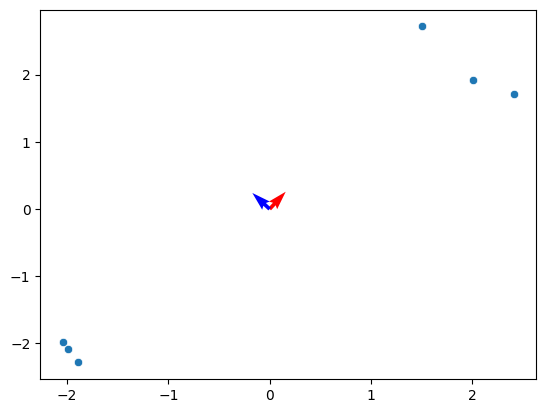

In [13]:
sns.scatterplot(x=C[:,0], y=C[:,1])
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, vectors[:,0], vectors[:,1], color=['r','b'], scale = 21)
plt.show()

<Axes: >

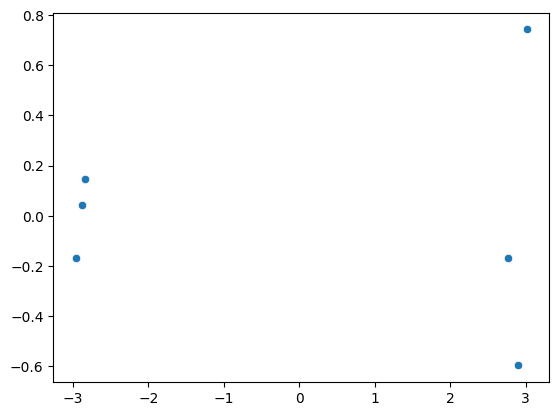

In [14]:
sns.scatterplot(x=B[:,0], y=B[:,1])

# 3 Предварительные знания 

Основные математические понятия с которыми надо быть знакомыми:
- собственные значения и собственные вектора, 
- матрица ковариаций,
- матричные разложения и SVD.


### Книги

### PCA:
- Jolliffe, I. T. (2002). Principal Component Analysis. Springer Series in Statistics. New York: Springer-Verlag. doi:10.1007/b98835. ISBN 978-0-387-95442-4

### SVD:
- Голуб Дж., ван Лоун Ч. Матричные вычисления 
- Дж. Деммель - Вычислительная линейная алгебра

[wiki: Principal component analysis][3]

[3]: https://en.wikipedia.org/wiki/Principal_component_analysis

# 4 Основы метода

[Алгоритм через матрицу ковариаций](https://en.wikipedia.org/wiki/Principal_component_analysis#Computing_PCA_using_the_covariance_method)

## Алгоритм

#### Шаг 1
Нормируем исходный набор данных, приводя их к единому масштабу.
Для этого из каждого значения вычитаем среднее значение его столбца.

#### Шаг 2
Вычисляем матрицу ковариации (на нормированных данных).
Ковариационная матрица это квадратная матрица, на диагонали которой располагаются дисперсии векторов, а внедиагональные элементы — ковариации между векторами. Векторами здесь выступают столбцы исходного датасета. Ковариационная матрица позволяет увидеть, есть ли какая-либо связь между фичами.

#### Шаг 3
Делаем разложение матрицы ковариации на собственные вектора и собственные числа На выходе у вас должно получится столько же пар "собственный вектор-собственное число" сколько фичей в датасете. Собственные векторы матрицы ковариации являются направлениями осей, где наблюдается наибольшая дисперсия (т.е. раскидана большая часть информации). Эти вектора и называются главными компонентами. А собственные значения — это коэффициенты, которые отражают величину дисперсии.

#### Шаг 4
Отсортируйте собственные значения в порядке убывания вместе с соответствующим им собственными векторами. Чем больше собственное число — тем больше дисперсия. Соответственно, отсортировав их мы получим, что первый собственный вектор будет главным компонентом (который отражает наибольшую изменчивость.), второй - вторым компонентом и т.д

#### Шаг 5
Берем N первых собственных векторов. Это и есть искомые главные компоненты.

#### Шаг 6
Снижение размерности.
Приведем исходные данные в сокращенный формат. Для этого надо перемножить исходные данные с отобранными собственными векторами

$$ X_{reduced} = X_{meaned} \cdot W_{pca}$$

где
- $X_{reduced}$ — уменьшая матрица фичей,
- $X_{meaned}$ — матрица исходных нормированных фичей,
- $W_{pca}$ — матрица из отобранных топ-N векторов главных компонент.



один из источников
https://sebastianraschka.com/Articles/2014_pca_step_by_step.html

In [15]:
import pandas as pd

In [16]:
d = {'Gene1': [10, 11, 8, 3, 1, 2],
     'Gene2': [6, 4, 5, 3, 2.8, 1]}
df = pd.DataFrame(data=d)

Gene1, Gene2 - переменные (признаки), которые определены для каждого отдельного образца (мыши)

In [17]:
df.head(6)

,Gene1,Gene2
0,10,6.0
1,11,4.0
2,8,5.0
3,3,3.0
4,1,2.8
5,2,1.0


plot 3d 

In [18]:
d = {'Gene1': [10, 11, 8, 3, 1, 2],
     'Gene2': [6, 4, 5, 3, 2.8, 1],
     'Gene3': [12, 9, 10, 2.5, 1.3, 2]}
df = pd.DataFrame(data=d)

what about 4 genes

In [19]:
d = {'Gene1': [10, 11, 8, 3, 1, 2],
     'Gene2': [6, 4, 5, 3, 2.8, 1],
     'Gene3': [12, 9, 10, 2.5, 1.3, 2],
     'Gene4': [5, 7, 6, 2, 4, 7]}
df = pd.DataFrame(data=d)

Как брать данные с большим числом признаков, и отображать в удобном для нас виде (2d график)

сделать смещение точек чтобы центр был в 0,

потом надо нарисовать сеаборрном лин рег 

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
